# Criminal Incidents in Victoria


Questions asked on criminal incidents in Victoria

Which LGAs, (top 10 LGAs) has the highest crime rate?
Which top 10 suburbs have the highest crime rate?

Where are the hotspots for crimes - you may want to use gmaps for API use?

In [110]:
# Import Dependencies
import pandas as pd
import numpy as np
from scipy import stats
import os, sys
import matplotlib.pyplot as plt

In [111]:
# Reference the file where the CSV is located
csv_path = "Resources\LGA_Criminal_Incidents.csv"


# Import the data into a Pandas DataFrame
crime_df = pd.read_csv(csv_path)
crime_df

,Year,Year ending,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Subgroup,Incidents Recorded
0,2021,December,Alpine,3691,Dederang,A Crimes against the person,Other crimes against the person,Other crimes against the person,1
1,2021,December,Alpine,3691,Dederang,B Property and deception offences,B30 Burglary/Break and enter,B321 Residential non-aggravated burglary,1
2,2021,December,Alpine,3691,Dederang,B Property and deception offences,B50 Deception,B53 Obtain benefit by deception,1
3,2021,December,Alpine,3691,Kergunyah South,E Justice procedures offences,E10 Justice procedures,E14 Pervert the course of justice or commit pe...,1
4,2021,December,Alpine,3691,Mongans Bridge,E Justice procedures offences,E20 Breaches of orders,E21 Breach family violence order,1
...,...,...,...,...,...,...,...,...,...
324432,2012,December,Yarriambiack,3489,Tempy,A Crimes against the person,"A70 Stalking, harassment and threatening behav...",A712 Non-FV Stalking,1
324433,2012,December,Yarriambiack,3489,Tempy,B Property and deception offences,B40 Theft,B45 Receiving or handling stolen goods,2
324434,2012,December,Yarriambiack,3489,Tempy,D Public order and security offences,D10 Weapons and explosives offences,D11 Firearms offences,1
324435,2012,December,Yarriambiack,3489,Tempy,D Public order and security offences,D20 Disorderly and offensive conduct,D23 Offensive conduct,1


In [112]:
#Rename of columns with underscores
crime_df_rename = crime_df.rename(columns={"Suburb/Town Name": "suburb",
                                          "Local Government Area": "LGA",
                                          "Offence Division": "Offence_Division",
                                          "Offence Subdivision": "Offence_Subdivision",
                                          "Offence Subgroup": "Offence_Subgroup",
                                          "Incidents Recorded": "Incidents_Recorded",
                                          "Year ending": "Year_ending"})
crime_df_rename

,Year,Year_ending,LGA,Postcode,suburb,Offence_Division,Offence_Subdivision,Offence_Subgroup,Incidents_Recorded
0,2021,December,Alpine,3691,Dederang,A Crimes against the person,Other crimes against the person,Other crimes against the person,1
1,2021,December,Alpine,3691,Dederang,B Property and deception offences,B30 Burglary/Break and enter,B321 Residential non-aggravated burglary,1
2,2021,December,Alpine,3691,Dederang,B Property and deception offences,B50 Deception,B53 Obtain benefit by deception,1
3,2021,December,Alpine,3691,Kergunyah South,E Justice procedures offences,E10 Justice procedures,E14 Pervert the course of justice or commit pe...,1
4,2021,December,Alpine,3691,Mongans Bridge,E Justice procedures offences,E20 Breaches of orders,E21 Breach family violence order,1
...,...,...,...,...,...,...,...,...,...
324432,2012,December,Yarriambiack,3489,Tempy,A Crimes against the person,"A70 Stalking, harassment and threatening behav...",A712 Non-FV Stalking,1
324433,2012,December,Yarriambiack,3489,Tempy,B Property and deception offences,B40 Theft,B45 Receiving or handling stolen goods,2
324434,2012,December,Yarriambiack,3489,Tempy,D Public order and security offences,D10 Weapons and explosives offences,D11 Firearms offences,1
324435,2012,December,Yarriambiack,3489,Tempy,D Public order and security offences,D20 Disorderly and offensive conduct,D23 Offensive conduct,1


In [113]:
#Dropping postcodes as it was determined it would provide very little information with regards to analysing data.
#It was noted that some postcodes are shared with certain suburbs.
crime_df_rename.drop(['Year_ending', 'Postcode'], axis=1, inplace=True)

In [114]:
crime_df_rename

,Year,LGA,suburb,Offence_Division,Offence_Subdivision,Offence_Subgroup,Incidents_Recorded
0,2021,Alpine,Dederang,A Crimes against the person,Other crimes against the person,Other crimes against the person,1
1,2021,Alpine,Dederang,B Property and deception offences,B30 Burglary/Break and enter,B321 Residential non-aggravated burglary,1
2,2021,Alpine,Dederang,B Property and deception offences,B50 Deception,B53 Obtain benefit by deception,1
3,2021,Alpine,Kergunyah South,E Justice procedures offences,E10 Justice procedures,E14 Pervert the course of justice or commit pe...,1
4,2021,Alpine,Mongans Bridge,E Justice procedures offences,E20 Breaches of orders,E21 Breach family violence order,1
...,...,...,...,...,...,...,...
324432,2012,Yarriambiack,Tempy,A Crimes against the person,"A70 Stalking, harassment and threatening behav...",A712 Non-FV Stalking,1
324433,2012,Yarriambiack,Tempy,B Property and deception offences,B40 Theft,B45 Receiving or handling stolen goods,2
324434,2012,Yarriambiack,Tempy,D Public order and security offences,D10 Weapons and explosives offences,D11 Firearms offences,1
324435,2012,Yarriambiack,Tempy,D Public order and security offences,D20 Disorderly and offensive conduct,D23 Offensive conduct,1


In [115]:
#Checked if any rows have any data with missing data
crime_df_rename.isnull()

,Year,LGA,suburb,Offence_Division,Offence_Subdivision,Offence_Subgroup,Incidents_Recorded
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
324432,False,False,False,False,False,False,False
324433,False,False,False,False,False,False,False
324434,False,False,False,False,False,False,False
324435,False,False,False,False,False,False,False


In [116]:
#Checking totals for any rows with missing data.
crime_df_rename.isnull().sum()

Year                   0
LGA                    0
suburb                 0
Offence_Division       0
Offence_Subdivision    0
Offence_Subgroup       0
Incidents_Recorded     0
dtype: int64

In [117]:
#Checking data types
crime_df_rename.dtypes

Year                    int64
LGA                    object
suburb                 object
Offence_Division       object
Offence_Subdivision    object
Offence_Subgroup       object
Incidents_Recorded     object
dtype: object

In [118]:
#Noted that Incidents_recorded column was in object/string format which would prove difficult to calculate data.
type(crime_df_rename.Incidents_Recorded[0]) 

str

In [119]:
#Used the replace method to change the data type of Incidents_Recorded as student was getting error with ','(commas).
#For example, first iterable error was 1,244, which had initially caused the column to be formatted to string/object.
crime_df_rename['Incidents_Recorded_Replace'] = crime_df_rename['Incidents_Recorded'].str.replace(',', '')
crime_df_rename['Incidents_Recorded_Replace'] = pd.to_numeric(crime_df_rename['Incidents_Recorded_Replace'])
crime_df_rename['Incidents_Recorded_Replace']

0         1
1         1
2         1
3         1
4         1
         ..
324432    1
324433    2
324434    1
324435    1
324436    1
Name: Incidents_Recorded_Replace, Length: 324437, dtype: int64

In [120]:
#Checking new column printout of dataframe
crime_df_rename

,Year,LGA,suburb,Offence_Division,Offence_Subdivision,Offence_Subgroup,Incidents_Recorded,Incidents_Recorded_Replace
0,2021,Alpine,Dederang,A Crimes against the person,Other crimes against the person,Other crimes against the person,1,1
1,2021,Alpine,Dederang,B Property and deception offences,B30 Burglary/Break and enter,B321 Residential non-aggravated burglary,1,1
2,2021,Alpine,Dederang,B Property and deception offences,B50 Deception,B53 Obtain benefit by deception,1,1
3,2021,Alpine,Kergunyah South,E Justice procedures offences,E10 Justice procedures,E14 Pervert the course of justice or commit pe...,1,1
4,2021,Alpine,Mongans Bridge,E Justice procedures offences,E20 Breaches of orders,E21 Breach family violence order,1,1
...,...,...,...,...,...,...,...,...
324432,2012,Yarriambiack,Tempy,A Crimes against the person,"A70 Stalking, harassment and threatening behav...",A712 Non-FV Stalking,1,1
324433,2012,Yarriambiack,Tempy,B Property and deception offences,B40 Theft,B45 Receiving or handling stolen goods,2,2
324434,2012,Yarriambiack,Tempy,D Public order and security offences,D10 Weapons and explosives offences,D11 Firearms offences,1,1
324435,2012,Yarriambiack,Tempy,D Public order and security offences,D20 Disorderly and offensive conduct,D23 Offensive conduct,1,1


In [121]:
#Confirming the change to data type.
#Incidents-Recorded_Replace will now be used to calculate as it is now an int64 dtype.
crime_df_rename.dtypes

Year                           int64
LGA                           object
suburb                        object
Offence_Division              object
Offence_Subdivision           object
Offence_Subgroup              object
Incidents_Recorded            object
Incidents_Recorded_Replace     int64
dtype: object

In [122]:
crime_df_rename.head()

,Year,LGA,suburb,Offence_Division,Offence_Subdivision,Offence_Subgroup,Incidents_Recorded,Incidents_Recorded_Replace
0,2021,Alpine,Dederang,A Crimes against the person,Other crimes against the person,Other crimes against the person,1,1
1,2021,Alpine,Dederang,B Property and deception offences,B30 Burglary/Break and enter,B321 Residential non-aggravated burglary,1,1
2,2021,Alpine,Dederang,B Property and deception offences,B50 Deception,B53 Obtain benefit by deception,1,1
3,2021,Alpine,Kergunyah South,E Justice procedures offences,E10 Justice procedures,E14 Pervert the course of justice or commit pe...,1,1
4,2021,Alpine,Mongans Bridge,E Justice procedures offences,E20 Breaches of orders,E21 Breach family violence order,1,1


In [123]:
#Finding the past 5 year data only
new_crime_df_rename = crime_df_rename[crime_df_rename['Year']>=2017]
new_crime_df_rename

,Year,LGA,suburb,Offence_Division,Offence_Subdivision,Offence_Subgroup,Incidents_Recorded,Incidents_Recorded_Replace
0,2021,Alpine,Dederang,A Crimes against the person,Other crimes against the person,Other crimes against the person,1,1
1,2021,Alpine,Dederang,B Property and deception offences,B30 Burglary/Break and enter,B321 Residential non-aggravated burglary,1,1
2,2021,Alpine,Dederang,B Property and deception offences,B50 Deception,B53 Obtain benefit by deception,1,1
3,2021,Alpine,Kergunyah South,E Justice procedures offences,E10 Justice procedures,E14 Pervert the course of justice or commit pe...,1,1
4,2021,Alpine,Mongans Bridge,E Justice procedures offences,E20 Breaches of orders,E21 Breach family violence order,1,1
...,...,...,...,...,...,...,...,...
169182,2017,Yarriambiack,Patchewollock,A Crimes against the person,A20 Assault and related offences,A212 Non-FV Serious assault,1,1
169183,2017,Yarriambiack,Patchewollock,A Crimes against the person,A20 Assault and related offences,A232 Non-FV Common assault,1,1
169184,2017,Yarriambiack,Patchewollock,A Crimes against the person,Other crimes against the person,Other crimes against the person,1,1
169185,2017,Yarriambiack,Patchewollock,B Property and deception offences,B30 Burglary/Break and enter,B321 Residential non-aggravated burglary,1,1


In [124]:
# Create a new DataFrame that looks into the top value counts LGA
# crime_df_rename['LGA'].value_counts().head(10)
crime_df_rename_sum = crime_df_rename[['LGA', 'Incidents_Recorded_Replace']].groupby('LGA').sum().reset_index()
crime_df_rename_sum = crime_df_rename_sum.sort_values('Incidents_Recorded_Replace', ascending=False).head(10)
crime_df_rename_sum

,LGA,Incidents_Recorded_Replace
43,Melbourne,258014
26,Greater Geelong,157097
13,Casey,149282
9,Brimbank,145415
32,Hume,144995
25,Greater Dandenong,134401
75,Wyndham,115606
17,Darebin,111413
73,Whittlesea,110246
19,Frankston,107546


In [125]:
# Used the function to collect value counts for each suburb for the 2017-2021 range
# Used above method to collect data for plotting 
# lga_10 = ["Greater Geelong", "Yarra Ranges", "Greater Bendigo", "Casey", "Ballarat", "Mornington Peninsula", "Brimbank", "Hume", "Kingston", "Melbourne"]
# top_10_figs = [14736, 10428, 10257, 9404, 9137, 8903, 8838, 8369, 8041, 7170]

lga_10 = crime_df_rename_sum['LGA'].tolist()
top_10_figs = crime_df_rename_sum['Incidents_Recorded_Replace'].tolist()

In [126]:
ypos = np.arange(len(lga_10))
ypos

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

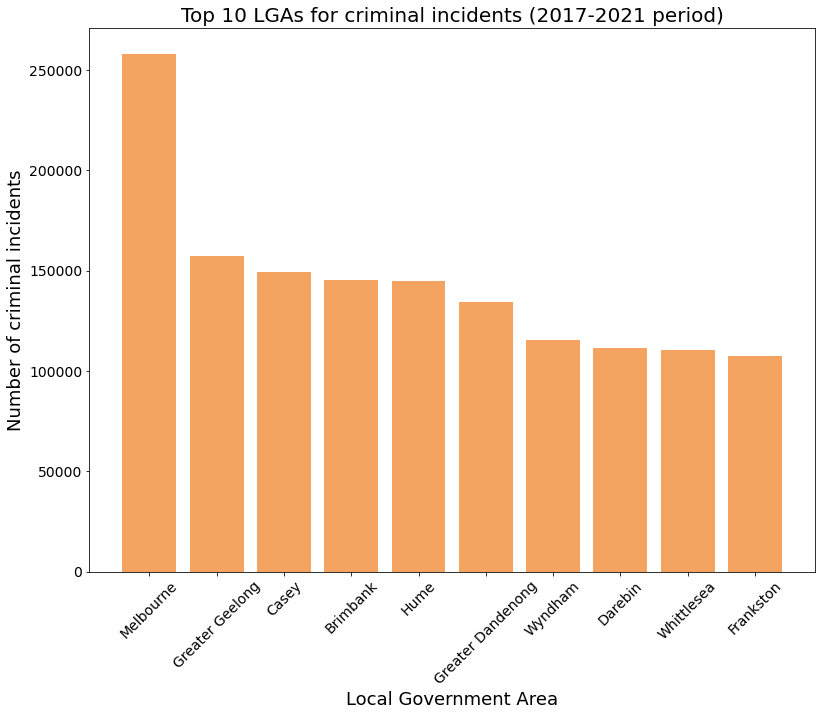

In [127]:
#Plot the graph
plt.rcParams["figure.figsize"] = (13,10)
plt.xticks(ypos, lga_10, rotation= 45, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Number of criminal incidents", fontsize=18)
plt.xlabel("Local Government Area", fontsize=18)
plt.title("Top 10 LGAs for criminal incidents (2017-2021 period)", fontsize=20)
plt.bar(ypos,top_10_figs, color='sandybrown')
plt.savefig("Images/Top_10_LGAs_2017-2021.png", dpi=300, bbox_inches='tight')

In [128]:
# Create a new DataFrame that looks into the top value counts LGA
# crime_df_rename['suburb'].value_counts().head(10)
crime_df_sub_sum = crime_df_rename[['suburb', 'Incidents_Recorded_Replace']].groupby('suburb').sum().reset_index()
crime_df_sub_sum = crime_df_sub_sum.sort_values('Incidents_Recorded_Replace', ascending=False).head(10)
crime_df_sub_sum

,suburb,Incidents_Recorded_Replace
1583,Melbourne,152529
682,Dandenong,58245
916,Frankston,56872
2199,Shepparton,40189
2050,Preston,39642
1624,Mildura,39349
2265,St Kilda,34150
2089,Reservoir,32890
2651,Werribee,32396
2096,Richmond,31844


In [129]:
# Used the function to collect value counts for each suburb for the 2017-2021 range
# Used above method to collect data for plotting 
# suburb_10 = ['Melbourne', 'Bundoora', 'Parkville', 'Docklands', 'Southbank', 'Cheltenham', 'Highett', 'South Yarra', 'Glen Iris', 'Greensborough']
# suburb_10_figs = [1531, 1422, 951, 861, 842, 828, 820, 799, 796, 761]
suburb_10 = crime_df_sub_sum['suburb'].tolist()
suburb_10_figs = crime_df_sub_sum['Incidents_Recorded_Replace'].tolist()

In [130]:
spos = np.arange(len(suburb_10))
spos

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<BarContainer object of 10 artists>

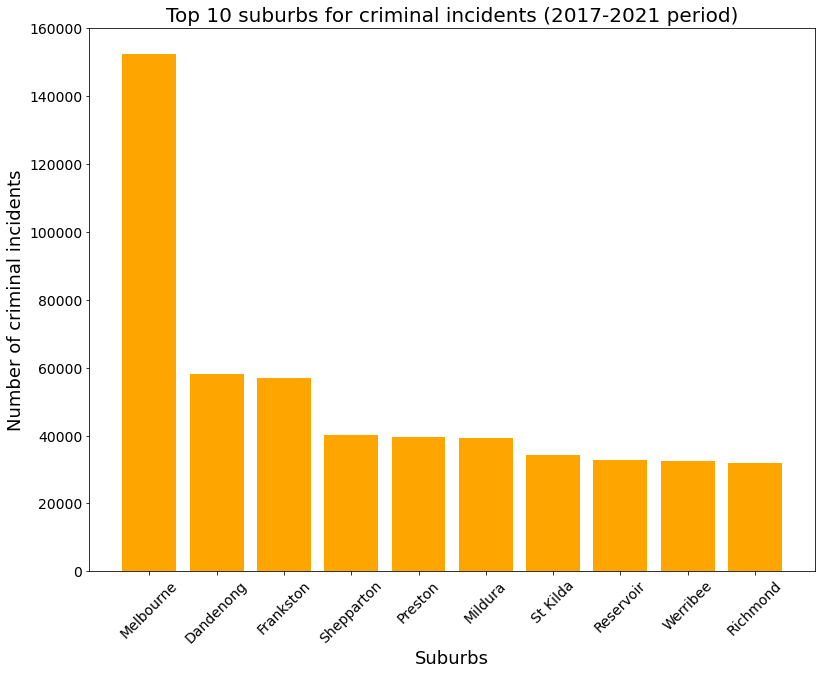

In [131]:
#Plot the graph
plt.rcParams["figure.figsize"] = (13,10)
plt.xticks(spos, suburb_10, rotation= 45, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Number of criminal incidents", fontsize=18)
plt.xlabel("Suburbs", fontsize=18)
plt.title("Top 10 suburbs for criminal incidents (2017-2021 period)", fontsize=20)
plt.bar(spos,suburb_10_figs, color='orange')
# plt.savefig("Images/Top_10_suburbs_2017-2021.png", dpi=300, bbox_inches='tight')

In [132]:
#Collecting 2017 data only - Our project team had agreed to obtain data for last 5 years only
crime_df_rename17 = crime_df_rename[crime_df_rename['Year']==2017]
crime_df_rename17.head()

,Year,LGA,suburb,Offence_Division,Offence_Subdivision,Offence_Subgroup,Incidents_Recorded,Incidents_Recorded_Replace
135981,2017,Alpine,Dederang,A Crimes against the person,A20 Assault and related offences,A231 FV Common assault,1,1
135982,2017,Alpine,Dederang,A Crimes against the person,Other crimes against the person,Other crimes against the person,1,1
135983,2017,Alpine,Dederang,C Drug offences,C10 Drug dealing and trafficking,C12 Drug trafficking,1,1
135984,2017,Alpine,Dederang,D Public order and security offences,D20 Disorderly and offensive conduct,D22 Drunk and disorderly in public,1,1
135985,2017,Alpine,Glen Creek,D Public order and security offences,D10 Weapons and explosives offences,D11 Firearms offences,2,2


In [133]:
#Collection of value counts for 2017 suburbs, top 10 found
# crime_df_rename17['suburb'].value_counts().head(10)
crime_df_rename17_sum = crime_df_rename17[['suburb', 'Incidents_Recorded_Replace']].groupby('suburb').sum().reset_index()
crime_df_rename17_sum = crime_df_rename17_sum.sort_values('Incidents_Recorded_Replace', ascending=False).head(10)
crime_df_rename17_sum

,suburb,Incidents_Recorded_Replace
1288,Melbourne,15686
544,Dandenong,5875
736,Frankston,5529
1791,Shepparton,4066
1665,Preston,4040
1324,Mildura,3829
1845,St Kilda,3473
1392,Morwell,3229
1701,Reservoir,3211
1706,Richmond,3122


In [134]:
# Create an array that contains the number of value counts for each top 10 suburb for the 2017 year only
# suburb_2017 = ['Melbourne', 'Bundoora', 'Parkville', 'Docklands', 'Highett', 'Southbank', 'Cheltenham', 'Flemington', 'South Yarra', 'Port Melbourne'] 
# suburb_2017_figs = [155, 153, 100, 90, 90, 85, 85, 82, 80, 78]
suburb_2017 = crime_df_rename17_sum['suburb'].tolist()
suburb_2017_figs = crime_df_rename17_sum['Incidents_Recorded_Replace'].tolist()

In [135]:
rpos = np.arange(len(suburb_10))
rpos

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

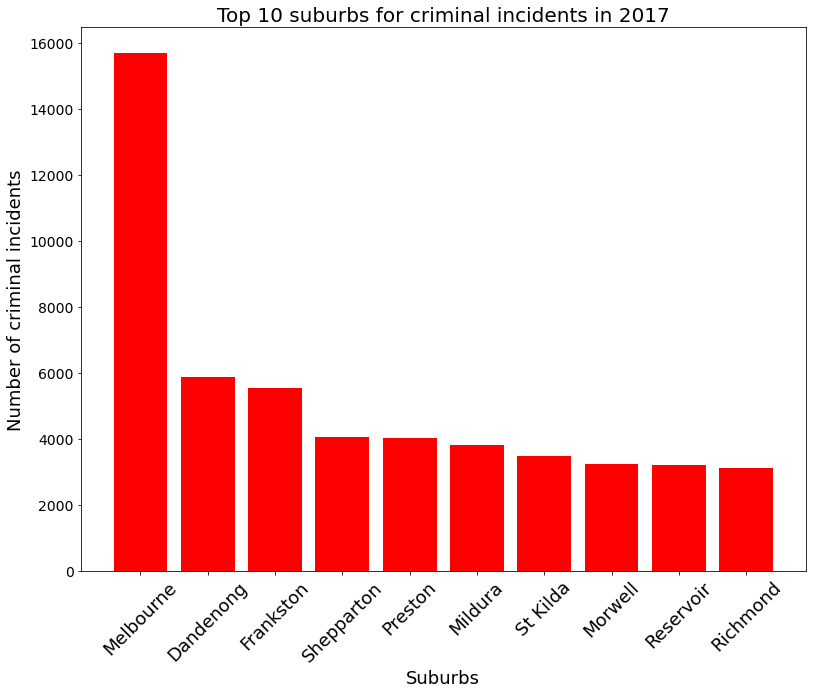

In [136]:
#Plot the graph
plt.rcParams["figure.figsize"] = (13,10)
plt.title("Top 10 suburbs for criminal incidents in 2017", fontsize=20)
plt.bar(suburb_2017, suburb_2017_figs, align="center", color='red')
plt.xticks(rpos, suburb_2017, rotation= 45, fontsize=18)
plt.yticks(fontsize=14)
plt.ylabel("Number of criminal incidents", fontsize=18)
plt.xlabel("Suburbs", fontsize=18)
# plt.ylim((0,160))
#plt.savefig("Images/Top_10_suburbs_2017.png", dpi=300, bbox_inches='tight')
plt.show()

In [137]:
#Collecting 2018 data only - Our project team had agreed to obtain data for last 5 years only
crime_df_rename18 = crime_df_rename[crime_df_rename['Year']==2018]
crime_df_rename18.head()

,Year,LGA,suburb,Offence_Division,Offence_Subdivision,Offence_Subgroup,Incidents_Recorded,Incidents_Recorded_Replace
102456,2018,Alpine,Dederang,A Crimes against the person,A20 Assault and related offences,A232 Non-FV Common assault,1,1
102457,2018,Alpine,Dederang,A Crimes against the person,Other crimes against the person,Other crimes against the person,1,1
102458,2018,Alpine,Gundowring,A Crimes against the person,A20 Assault and related offences,"A22 Assault police, emergency services or othe...",1,1
102459,2018,Alpine,Gundowring,B Property and deception offences,B40 Theft,B41 Motor vehicle theft,1,1
102460,2018,Alpine,Gundowring,B Property and deception offences,B40 Theft,B49 Other theft,1,1


In [138]:
#Collection of value counts for 2018 suburbs, top 10 found
# crime_df_rename18['suburb'].value_counts().head(10)
crime_df_rename18_sum = crime_df_rename18[['suburb', 'Incidents_Recorded_Replace']].groupby('suburb').sum().reset_index()
crime_df_rename18_sum = crime_df_rename18_sum.sort_values('Incidents_Recorded_Replace', ascending=False).head(10)
crime_df_rename18_sum

,suburb,Incidents_Recorded_Replace
1296,Melbourne,15492
556,Dandenong,5981
747,Frankston,5893
1332,Mildura,4544
1807,Shepparton,4226
1674,Preston,4118
1396,Morwell,3403
1709,Reservoir,3332
1713,Richmond,3313
1868,St Kilda,3228


In [139]:
# Create an array that contains the number of value counts for each top 10 suburb for the 2018 year only
# suburb_2018 = ['Bundoora', 'Melbourne', 'Parkville', 'Southbank', 'Docklands', 'Cheltenham', 'Highett', 'South Yarra', 'Port Melbourne', 'Tullamarine'] 
# suburb_2018_figs = [152, 152, 106, 94, 89, 88, 87, 82, 82, 78]
suburb_2018 = crime_df_rename18_sum['suburb'].tolist()
suburb_2018_figs = crime_df_rename18_sum['Incidents_Recorded_Replace'].tolist()

In [140]:
kpos = np.arange(len(suburb_2018))
kpos

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Text(0.5, 0, 'Suburbs')

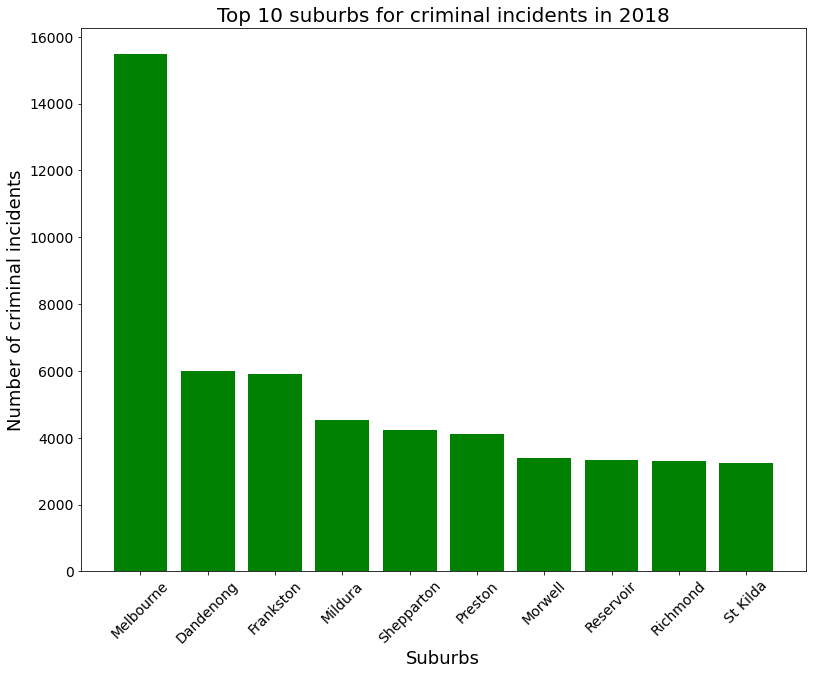

In [141]:
#Plot the graph
plt.rcParams["figure.figsize"] = (13,10)
plt.title("Top 10 suburbs for criminal incidents in 2018", fontsize=20)
plt.bar(suburb_2018, suburb_2018_figs, align="center", color='green')
plt.xticks(kpos, suburb_2018, rotation= 45, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Number of criminal incidents",fontsize=18)
plt.xlabel("Suburbs",fontsize=18)
# plt.ylim((0,160))
#plt.savefig("Images/Top_10_suburbs_2018.png", dpi=300, bbox_inches='tight')

In [142]:
#Collecting 2019 data only - Our project team had agreed to obtain data for last 5 years only
crime_df_rename19 = crime_df_rename[crime_df_rename['Year']==2019]
crime_df_rename19.head()

,Year,LGA,suburb,Offence_Division,Offence_Subdivision,Offence_Subgroup,Incidents_Recorded,Incidents_Recorded_Replace
68504,2019,Alpine,Dederang,A Crimes against the person,A20 Assault and related offences,A212 Non-FV Serious assault,1,1
68505,2019,Alpine,Dederang,B Property and deception offences,B20 Property damage,B21 Criminal damage,1,1
68506,2019,Alpine,Dederang,B Property and deception offences,B30 Burglary/Break and enter,B321 Residential non-aggravated burglary,1,1
68507,2019,Alpine,Dederang,B Property and deception offences,B40 Theft,B49 Other theft,1,1
68508,2019,Alpine,Dederang,D Public order and security offences,D20 Disorderly and offensive conduct,D22 Drunk and disorderly in public,2,2


In [143]:
#Collection of value counts for 2019 suburbs, top 10 found
# crime_df_rename19['suburb'].value_counts().head(10)
crime_df_rename19_sum = crime_df_rename19[['suburb', 'Incidents_Recorded_Replace']].groupby('suburb').sum().reset_index()
crime_df_rename19_sum = crime_df_rename19_sum.sort_values('Incidents_Recorded_Replace', ascending=False).head(10)
crime_df_rename19_sum

,suburb,Incidents_Recorded_Replace
1328,Melbourne,15786
577,Dandenong,6032
774,Frankston,5735
1364,Mildura,4511
1859,Shepparton,4356
1727,Preston,4038
1435,Morwell,3782
2225,Werribee,3683
1765,Richmond,3357
1761,Reservoir,3345


In [144]:
# Create an array that contains the number of value counts for each top 10 suburb for the 2019 year only
# suburb_2019 = ['Melbourne', 'Bundoora', 'Parkville', 'Highett', 'Southbank', 'Docklands', 'Cheltenham', 'South Yarra', 'Greensborough', 'Glen Iris'] 
# suburb_2019_figs = [160, 148, 93, 88, 88, 85, 85, 84, 80, 79]
suburb_2019 = crime_df_rename19_sum['suburb'].tolist()
suburb_2019_figs = crime_df_rename19_sum['Incidents_Recorded_Replace'].tolist()

In [145]:
opos = np.arange(len(suburb_2019))
opos

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Text(0.5, 0, 'Suburbs')

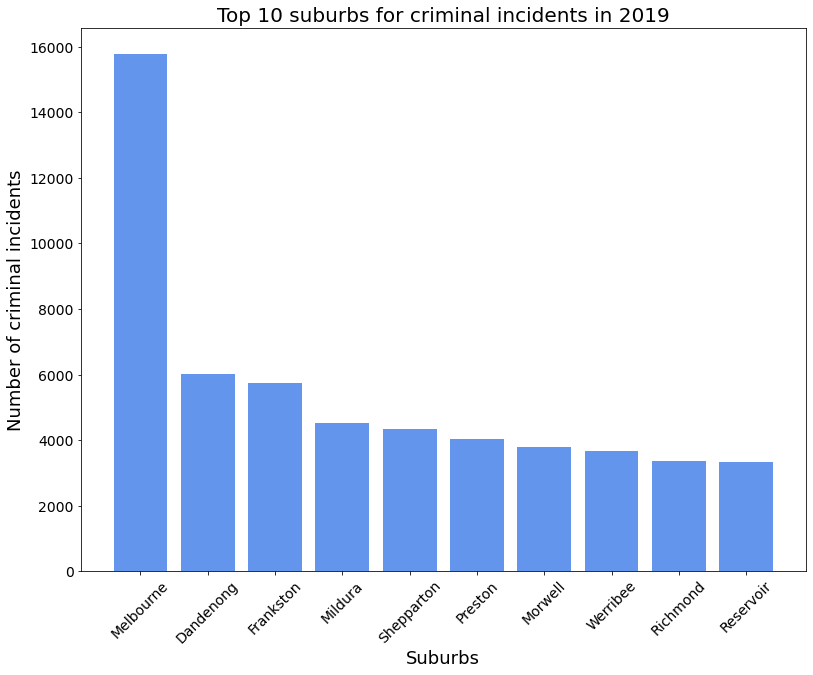

In [146]:
#Plot the graph
plt.rcParams["figure.figsize"] = (13,10)
plt.title("Top 10 suburbs for criminal incidents in 2019", fontsize=20)
plt.bar(suburb_2019, suburb_2019_figs, align="center", color='cornflowerblue')
plt.xticks(opos, suburb_2019, rotation= 45, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Number of criminal incidents", fontsize=18)
plt.xlabel("Suburbs", fontsize=18)
# plt.ylim((0,165))
#plt.savefig("Images/Top_10_suburbs_2019.png", dpi=300, bbox_inches='tight')

In [147]:
#Collecting 2020 data only - Our project team had agreed to obtain data for last 5 years only
crime_df_rename20 = crime_df_rename[crime_df_rename['Year']==2020]
crime_df_rename20.head()

,Year,LGA,suburb,Offence_Division,Offence_Subdivision,Offence_Subgroup,Incidents_Recorded,Incidents_Recorded_Replace
33729,2020,Alpine,Dederang,A Crimes against the person,A20 Assault and related offences,A211 FV Serious assault,1,1
33730,2020,Alpine,Dederang,B Property and deception offences,B40 Theft,B41 Motor vehicle theft,1,1
33731,2020,Alpine,Glen Creek,C Drug offences,C30 Drug use and possession,C32 Drug possession,1,1
33732,2020,Alpine,Gundowring,C Drug offences,C10 Drug dealing and trafficking,C12 Drug trafficking,1,1
33733,2020,Alpine,Gundowring,E Justice procedures offences,E10 Justice procedures,E13 Resist or hinder officer,1,1


In [148]:
#Collection of value counts for 2020 suburbs, top 10 found
# crime_df_rename20['suburb'].value_counts().head(10)
crime_df_rename20_sum = crime_df_rename20[['suburb', 'Incidents_Recorded_Replace']].groupby('suburb').sum().reset_index()
crime_df_rename20_sum = crime_df_rename20_sum.sort_values('Incidents_Recorded_Replace', ascending=False).head(10)
crime_df_rename20_sum

,suburb,Incidents_Recorded_Replace
1331,Melbourne,14586
561,Dandenong,6064
764,Frankston,5555
1758,Reservoir,4371
1851,Shepparton,4187
1720,Preston,3830
1762,Richmond,3789
1369,Mildura,3733
1912,St Kilda,3569
2211,Werribee,3450


In [149]:
# Create an array that contains the number of value counts for each top 10 suburb for the 2020 year only
# suburb_2020 = ['Melbourne', 'Bundoora', 'Parkville', 'Docklands', 'Port Melbourne', 'Southbank', 'Highett', 'Cheltenham', 'South Yarra', 'Greensborough'] 
# suburb_2020_figs = [154, 147, 97, 94, 87, 86, 85, 85, 81, 79]
suburb_2020 = crime_df_rename20_sum['suburb'].tolist()
suburb_2020_figs = crime_df_rename20_sum['Incidents_Recorded_Replace'].tolist()

In [150]:
vpos = np.arange(len(suburb_2020))
vpos

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Text(0.5, 0, 'Suburbs')

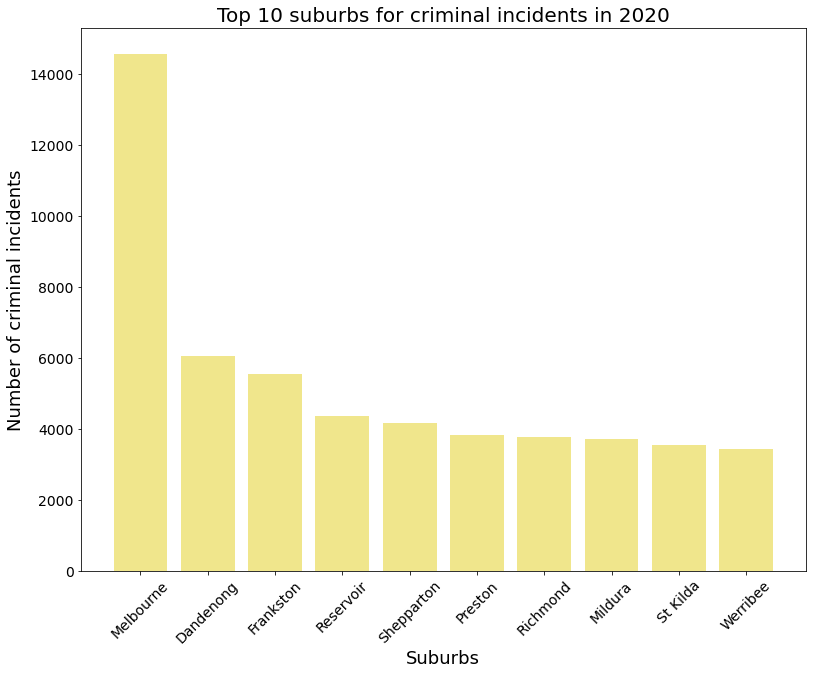

In [151]:
#Plot the graph
plt.rcParams["figure.figsize"] = (13,10)
plt.title("Top 10 suburbs for criminal incidents in 2020", fontsize=20)
plt.bar(suburb_2020, suburb_2020_figs, align="center", color='khaki')
plt.xticks(vpos, suburb_2020, rotation= 45, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Number of criminal incidents", fontsize=18)
plt.xlabel("Suburbs", fontsize=18)
# plt.ylim((0,165))
#plt.savefig("Images/Top_10_suburbs_2020.png", dpi=300, bbox_inches='tight')

In [152]:
#Collecting 2021 data only - Our project team had agreed to obtain data for last 5 years only
crime_df_rename21 = crime_df_rename[crime_df_rename['Year']==2021]
crime_df_rename21.head()

,Year,LGA,suburb,Offence_Division,Offence_Subdivision,Offence_Subgroup,Incidents_Recorded,Incidents_Recorded_Replace
0,2021,Alpine,Dederang,A Crimes against the person,Other crimes against the person,Other crimes against the person,1,1
1,2021,Alpine,Dederang,B Property and deception offences,B30 Burglary/Break and enter,B321 Residential non-aggravated burglary,1,1
2,2021,Alpine,Dederang,B Property and deception offences,B50 Deception,B53 Obtain benefit by deception,1,1
3,2021,Alpine,Kergunyah South,E Justice procedures offences,E10 Justice procedures,E14 Pervert the course of justice or commit pe...,1,1
4,2021,Alpine,Mongans Bridge,E Justice procedures offences,E20 Breaches of orders,E21 Breach family violence order,1,1


In [153]:
#Collection of value counts for 2021 suburbs, top 10 found
# crime_df_rename21['suburb'].value_counts().head(10)
crime_df_rename21_sum = crime_df_rename21[['suburb', 'Incidents_Recorded_Replace']].groupby('suburb').sum().reset_index()
crime_df_rename21_sum = crime_df_rename21_sum.sort_values('Incidents_Recorded_Replace', ascending=False).head(10)
crime_df_rename21_sum

,suburb,Incidents_Recorded_Replace
1288,Melbourne,13437
558,Dandenong,4602
748,Frankston,4156
1811,Shepparton,4153
1325,Mildura,3804
1719,Reservoir,3219
2173,Werribee,3116
1868,St Kilda,3083
1725,Richmond,3059
1683,Preston,3052


In [154]:
# Create an array that contains the number of value counts for each top 10 suburb for the 2021 year only
# suburb_2021 = ['Melbourne', 'Bundoora', 'Parkville', 'Docklands', 'South Yarra', 'Southbank', 'Greensborough', 'Port Melbourne', 'Glen Iris', 'Truganina']
# suburb_2021_figs = [160, 142, 97, 90, 88, 85, 82, 82, 81, 78]
suburb_2021 = crime_df_rename21_sum['suburb'].tolist()
suburb_2021_figs = crime_df_rename21_sum['Incidents_Recorded_Replace'].tolist()

In [155]:
jpos = np.arange(len(suburb_2021))
jpos

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Text(0.5, 0, 'Suburbs')

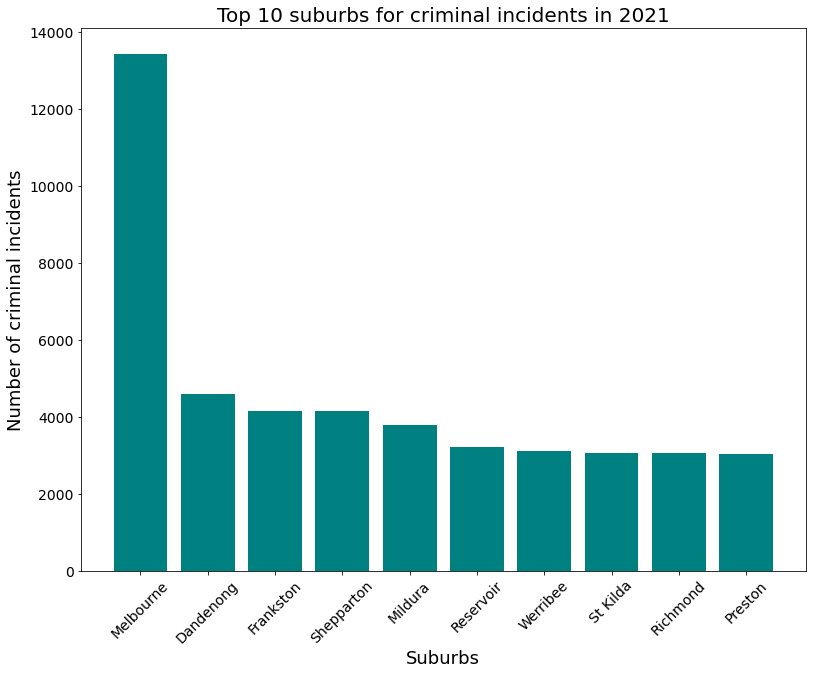

In [156]:
#Plot the graph
plt.rcParams["figure.figsize"] = (13,10)
plt.title("Top 10 suburbs for criminal incidents in 2021", fontsize=20)
plt.bar(suburb_2021, suburb_2021_figs, align="center", color='teal')
plt.xticks(jpos, suburb_2021, rotation= 45, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Number of criminal incidents", fontsize=18)
plt.xlabel("Suburbs", fontsize=18)
# plt.ylim((0,165))
#plt.savefig("Images/Top_10_suburbs_2021.png", dpi=300, bbox_inches='tight')

In [157]:
crime_df_rename21.head()

,Year,LGA,suburb,Offence_Division,Offence_Subdivision,Offence_Subgroup,Incidents_Recorded,Incidents_Recorded_Replace
0,2021,Alpine,Dederang,A Crimes against the person,Other crimes against the person,Other crimes against the person,1,1
1,2021,Alpine,Dederang,B Property and deception offences,B30 Burglary/Break and enter,B321 Residential non-aggravated burglary,1,1
2,2021,Alpine,Dederang,B Property and deception offences,B50 Deception,B53 Obtain benefit by deception,1,1
3,2021,Alpine,Kergunyah South,E Justice procedures offences,E10 Justice procedures,E14 Pervert the course of justice or commit pe...,1,1
4,2021,Alpine,Mongans Bridge,E Justice procedures offences,E20 Breaches of orders,E21 Breach family violence order,1,1


In [158]:
# crime_df_rename21['Offence_Subgroup'].value_counts().head(20)

crime_df_rename21_subgroup = crime_df_rename21[['Offence_Subgroup', 'Incidents_Recorded_Replace']].groupby('Offence_Subgroup').sum().reset_index()
crime_df_rename21_subgroup = crime_df_rename21_subgroup.sort_values('Incidents_Recorded_Replace', ascending=False).head(20)
crime_df_rename21_subgroup.reset_index(drop=True)

,Offence_Subgroup,Incidents_Recorded_Replace
0,B42 Steal from a motor vehicle,43740
1,B49 Other theft,30630
2,B21 Criminal damage,28673
3,E21 Breach family violence order,23859
4,B321 Residential non-aggravated burglary,16347
5,B53 Obtain benefit by deception,15664
6,E23 Breach bail conditions,15094
7,B43 Steal from a retail store,14661
8,A231 FV Common assault,13996
9,B41 Motor vehicle theft,10718


In [159]:
crime_df_rename21['Offence_Subgroup'].unique()

array(['Other crimes against the person',
       'B321 Residential non-aggravated burglary',
       'B53 Obtain benefit by deception',
       'E14 Pervert the course of justice or commit perjury',
       'E21 Breach family violence order',
       'E22 Breach intervention order', 'B49 Other theft',
       'B21 Criminal damage', 'B22 Graffiti', 'C32 Drug possession',
       'D11 Firearms offences', 'A211 FV Serious assault',
       'A231 FV Common assault', 'A232 Non-FV Common assault',
       'A89 Other dangerous or negligent acts endangering people',
       'B42 Steal from a motor vehicle', 'B43 Steal from a retail store',
       'F92 Public health and safety offences', 'A712 Non-FV Stalking',
       'B19 Other fire related offences',
       'A722 Non-FV Harassment and private nuisance',
       'B41 Motor vehicle theft',
       'B45 Receiving or handling stolen goods', 'C12 Drug trafficking',
       'E13 Resist or hinder officer', 'A212 Non-FV Serious assault',
       'A721 FV Harassme

In [160]:
crime_df_rename21_F92 = crime_df_rename21.loc[(crime_df_rename21['Offence_Subgroup'] == 'F92 Public health and safety offences'),:]
crime_df_rename21_F92

,Year,LGA,suburb,Offence_Division,Offence_Subdivision,Offence_Subgroup,Incidents_Recorded,Incidents_Recorded_Replace
24,2021,Alpine,Mount Beauty,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,2,2
40,2021,Alpine,Dandongadale,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,2,2
88,2021,Alpine,Myrtleford,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,15,15
108,2021,Alpine,Mount Buffalo,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,1,1
149,2021,Alpine,Bright,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,3,3
...,...,...,...,...,...,...,...,...
33605,2021,Yarriambiack,Rupanyup,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,6,6
33629,2021,Yarriambiack,Murtoa,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,1,1
33634,2021,Yarriambiack,Brim,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,4,4
33649,2021,Yarriambiack,Minyip,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,3,3


In [215]:
#The sum of the 2021 - F92 Public health total number of incidents across Victoria.
#The last line of Incidents_Recorded_Replace will be collected for plotting.
# crime_df_rename21_F92.sum()
crime_df_rename21_F92_sum = crime_df_rename21_F92[['Offence_Subgroup', 'Incidents_Recorded_Replace']].groupby('Offence_Subgroup').sum()
crime_df_rename21_F92_sum = crime_df_rename21_F92_sum.reset_index()
crime_df_rename21_F92_fig = crime_df_rename21_F92_sum['Incidents_Recorded_Replace']
crime_df_rename21_F92_sum

,Offence_Subgroup,Incidents_Recorded_Replace
0,F92 Public health and safety offences,10153


In [162]:
crime_df_rename20.head()

,Year,LGA,suburb,Offence_Division,Offence_Subdivision,Offence_Subgroup,Incidents_Recorded,Incidents_Recorded_Replace
33729,2020,Alpine,Dederang,A Crimes against the person,A20 Assault and related offences,A211 FV Serious assault,1,1
33730,2020,Alpine,Dederang,B Property and deception offences,B40 Theft,B41 Motor vehicle theft,1,1
33731,2020,Alpine,Glen Creek,C Drug offences,C30 Drug use and possession,C32 Drug possession,1,1
33732,2020,Alpine,Gundowring,C Drug offences,C10 Drug dealing and trafficking,C12 Drug trafficking,1,1
33733,2020,Alpine,Gundowring,E Justice procedures offences,E10 Justice procedures,E13 Resist or hinder officer,1,1


In [165]:
# crime_df_rename20['Offence_Subgroup'].value_counts().head(20)
crime_df_rename20_subgroup = crime_df_rename20[['Offence_Subgroup', 'Incidents_Recorded_Replace']].groupby('Offence_Subgroup').sum().reset_index()
crime_df_rename20_subgroup = crime_df_rename20_subgroup.sort_values('Incidents_Recorded_Replace', ascending=False).head(20)
crime_df_rename20_subgroup.reset_index(drop=True)

,Offence_Subgroup,Incidents_Recorded_Replace
0,B42 Steal from a motor vehicle,46753
1,F92 Public health and safety offences,37029
2,B49 Other theft,33150
3,B21 Criminal damage,29178
4,E21 Breach family violence order,24178
5,B53 Obtain benefit by deception,18457
6,B321 Residential non-aggravated burglary,17639
7,E23 Breach bail conditions,17467
8,B43 Steal from a retail store,14615
9,A231 FV Common assault,13986


In [167]:
crime_df_rename20_F92 = crime_df_rename20.loc[(crime_df_rename20['Offence_Subgroup'] == 'F92 Public health and safety offences'),:]
crime_df_rename20_F92

,Year,LGA,suburb,Offence_Division,Offence_Subdivision,Offence_Subgroup,Incidents_Recorded,Incidents_Recorded_Replace
33741,2020,Alpine,Tawonga,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,2,2
33775,2020,Alpine,Buffalo River,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,7,7
33821,2020,Alpine,Myrtleford,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,12,12
33837,2020,Alpine,Mount Buffalo,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,1,1
33847,2020,Alpine,Porepunkah,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,1,1
...,...,...,...,...,...,...,...,...
68386,2020,Yarriambiack,Murtoa,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,7,7
68408,2020,Yarriambiack,Minyip,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,1,1
68461,2020,Yarriambiack,Warracknabeal,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,16,16
68471,2020,Yarriambiack,Beulah,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,1,1


In [214]:
#The sum of the 2020 - F92 Public health total number of incidents across Victoria.
#The last line of Incidents_Recorded_Replace will be collected for plotting.
# crime_df_rename20_F92.sum()
crime_df_rename20_F92_sum = crime_df_rename20_F92[['Offence_Subgroup', 'Incidents_Recorded_Replace']].groupby('Offence_Subgroup').sum()
crime_df_rename20_F92_sum = crime_df_rename20_F92_sum.reset_index()
crime_df_rename20_F92_fig = crime_df_rename20_F92_sum['Incidents_Recorded_Replace']
crime_df_rename20_F92_sum

,Offence_Subgroup,Incidents_Recorded_Replace
0,F92 Public health and safety offences,37029


In [169]:
crime_df_rename19.head()

,Year,LGA,suburb,Offence_Division,Offence_Subdivision,Offence_Subgroup,Incidents_Recorded,Incidents_Recorded_Replace
68504,2019,Alpine,Dederang,A Crimes against the person,A20 Assault and related offences,A212 Non-FV Serious assault,1,1
68505,2019,Alpine,Dederang,B Property and deception offences,B20 Property damage,B21 Criminal damage,1,1
68506,2019,Alpine,Dederang,B Property and deception offences,B30 Burglary/Break and enter,B321 Residential non-aggravated burglary,1,1
68507,2019,Alpine,Dederang,B Property and deception offences,B40 Theft,B49 Other theft,1,1
68508,2019,Alpine,Dederang,D Public order and security offences,D20 Disorderly and offensive conduct,D22 Drunk and disorderly in public,2,2


In [213]:
# crime_df_rename19['Offence_Subgroup'].value_counts().head()
crime_df_rename19_subgroup = crime_df_rename19[['Offence_Subgroup', 'Incidents_Recorded_Replace']].groupby('Offence_Subgroup').sum().reset_index()
crime_df_rename19_subgroup = crime_df_rename19_subgroup.sort_values('Incidents_Recorded_Replace', ascending=False).head()
crime_df_rename19_subgroup.reset_index(drop=True)

,Offence_Subgroup,Incidents_Recorded_Replace
0,B42 Steal from a motor vehicle,55001
1,B49 Other theft,41324
2,B21 Criminal damage,31891
3,B321 Residential non-aggravated burglary,23068
4,E21 Breach family violence order,21403


In [173]:
crime_df_rename19_F92 = crime_df_rename19.loc[(crime_df_rename19['Offence_Subgroup'] == 'F92 Public health and safety offences'),:]
crime_df_rename19_F92

,Year,LGA,suburb,Offence_Division,Offence_Subdivision,Offence_Subgroup,Incidents_Recorded,Incidents_Recorded_Replace
68867,2019,Ballarat,Bakery Hill,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,1,1
68924,2019,Ballarat,Ballarat Central,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,2,2
69658,2019,Ballarat,Wendouree,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,1,1
70166,2019,Banyule,Viewbank,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,1,1
70448,2019,Banyule,Montmorency,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,1,1
70507,2019,Bass Coast,Cowes,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,1,1
70920,2019,Bass Coast,Wonthaggi,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,1,1
72395,2019,Boroondara,Glen Iris,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,1,1
72958,2019,Brimbank,Deer Park,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,1,1
78423,2019,Glen Eira,Ormond,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,1,1


In [212]:
#The sum of the 2019 - F92 Public health total number of incidents across Victoria.
#The last line of Incidents_Recorded_Replace will be collected for plotting.
# crime_df_rename19_F92.sum()
crime_df_rename19_F92_sum = crime_df_rename19_F92[['Offence_Subgroup', 'Incidents_Recorded_Replace']].groupby('Offence_Subgroup').sum()
crime_df_rename19_F92_sum = crime_df_rename19_F92_sum.reset_index()
crime_df_rename19_F92_fig = crime_df_rename19_F92_sum['Incidents_Recorded_Replace']
crime_df_rename19_F92_sum


,Offence_Subgroup,Incidents_Recorded_Replace
0,F92 Public health and safety offences,55


In [61]:
crime_df_rename18.head()

,Year,LGA,suburb,Offence_Division,Offence_Subdivision,Offence_Subgroup,Incidents_Recorded,Incidents_Recorded_Replace
102456,2018,Alpine,Dederang,A Crimes against the person,A20 Assault and related offences,A232 Non-FV Common assault,1,1
102457,2018,Alpine,Dederang,A Crimes against the person,Other crimes against the person,Other crimes against the person,1,1
102458,2018,Alpine,Gundowring,A Crimes against the person,A20 Assault and related offences,"A22 Assault police, emergency services or othe...",1,1
102459,2018,Alpine,Gundowring,B Property and deception offences,B40 Theft,B41 Motor vehicle theft,1,1
102460,2018,Alpine,Gundowring,B Property and deception offences,B40 Theft,B49 Other theft,1,1


In [62]:
crime_df_rename18['Offence_Subgroup'].value_counts().head()

B49 Other theft                             1620
B321 Residential non-aggravated burglary    1358
B21 Criminal damage                         1329
B42 Steal from a motor vehicle              1167
E21 Breach family violence order            1068
Name: Offence_Subgroup, dtype: int64

In [176]:
crime_df_rename18_F92 = crime_df_rename18.loc[(crime_df_rename18['Offence_Subgroup'] == 'F92 Public health and safety offences'),:]
crime_df_rename18_F92

,Year,LGA,suburb,Offence_Division,Offence_Subdivision,Offence_Subgroup,Incidents_Recorded,Incidents_Recorded_Replace
102704,2018,Ararat,Dobie,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,1,1
103427,2018,Ballarat,Miners Rest,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,1,1
103742,2018,Banyule,Ivanhoe,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,1,1
103923,2018,Banyule,Bundoora,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,1,1
103998,2018,Banyule,Heidelberg,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,1,1
...,...,...,...,...,...,...,...,...
133709,2018,Wodonga,Wodonga,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,1,1
134005,2018,Wyndham,Hoppers Crossing,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,1,1
134062,2018,Wyndham,Tarneit,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,2,2
134166,2018,Wyndham,Point Cook,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,2,2


In [201]:
#The sum of the 2018 - F92 Public health total number of incidents across Victoria.
#The last line of Incidents_Recorded_Replace will be collected for plotting.
# crime_df_rename18_F92.sum()
crime_df_rename18_F92_sum = crime_df_rename18_F92[['Offence_Subgroup', 'Incidents_Recorded_Replace']].groupby('Offence_Subgroup').sum()
crime_df_rename18_F92_sum = crime_df_rename18_F92_sum.reset_index()
crime_df_rename18_F92_sum
crime_df_rename18_F92_fig = crime_df_rename18_F92_sum['Incidents_Recorded_Replace']

In [202]:
crime_df_rename17.head()

,Year,LGA,suburb,Offence_Division,Offence_Subdivision,Offence_Subgroup,Incidents_Recorded,Incidents_Recorded_Replace
135981,2017,Alpine,Dederang,A Crimes against the person,A20 Assault and related offences,A231 FV Common assault,1,1
135982,2017,Alpine,Dederang,A Crimes against the person,Other crimes against the person,Other crimes against the person,1,1
135983,2017,Alpine,Dederang,C Drug offences,C10 Drug dealing and trafficking,C12 Drug trafficking,1,1
135984,2017,Alpine,Dederang,D Public order and security offences,D20 Disorderly and offensive conduct,D22 Drunk and disorderly in public,1,1
135985,2017,Alpine,Glen Creek,D Public order and security offences,D10 Weapons and explosives offences,D11 Firearms offences,2,2


In [203]:
# crime_df_rename17['Offence_Subgroup'].value_counts().head()
crime_df_rename17_subgroup = crime_df_rename17[['Offence_Subgroup', 'Incidents_Recorded_Replace']].groupby('Offence_Subgroup').sum().reset_index()
crime_df_rename17_subgroup = crime_df_rename17_subgroup.sort_values('Incidents_Recorded_Replace', ascending=False).head()
crime_df_rename17_subgroup.reset_index(drop=True)

,Offence_Subgroup,Incidents_Recorded_Replace
0,B42 Steal from a motor vehicle,49099
1,B49 Other theft,35425
2,B21 Criminal damage,32693
3,B321 Residential non-aggravated burglary,27126
4,E21 Breach family violence order,18622


In [204]:
crime_df_rename17_F92 = crime_df_rename17.loc[(crime_df_rename17['Offence_Subgroup'] == 'F92 Public health and safety offences'),:]
crime_df_rename17_F92.head()

,Year,LGA,suburb,Offence_Division,Offence_Subdivision,Offence_Subgroup,Incidents_Recorded,Incidents_Recorded_Replace
136660,2017,Ballarat,Lucas,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,1,1
138578,2017,Baw Baw,Drouin West,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,1,1
141258,2017,Campaspe,Strathallan,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,1,1
141573,2017,Cardinia,Pakenham,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,1,1
142154,2017,Casey,Narre Warren,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,1,1


In [205]:
#The sum of the 2017 - F92 Public health total number of incidents across Victoria.
#The last line of Incidents_Recorded_Replace will be collected for plotting.
# crime_df_rename17_F92.sum()
crime_df_rename17_F92_sum = crime_df_rename17_F92[['Offence_Subgroup', 'Incidents_Recorded_Replace']].groupby('Offence_Subgroup').sum()
crime_df_rename17_F92_sum = crime_df_rename17_F92_sum.reset_index()
crime_df_rename17_F92_fig = crime_df_rename17_F92_sum['Incidents_Recorded_Replace']
crime_df_rename17_F92_sum

,Offence_Subgroup,Incidents_Recorded_Replace
0,F92 Public health and safety offences,30


In [217]:
# Collection of above data from the Incidents-Recorded_Replace for the range of 2017-2021
five_year_phealth = ["2017", "2018", "2019", "2020", "2021"]
incidents_public_health = [30, 111, 55, 37029, 10153]


In [218]:
ph_pos = np.arange(len(five_year_phealth))
ph_pos

array([0, 1, 2, 3, 4])

(0.0, 39000.0)

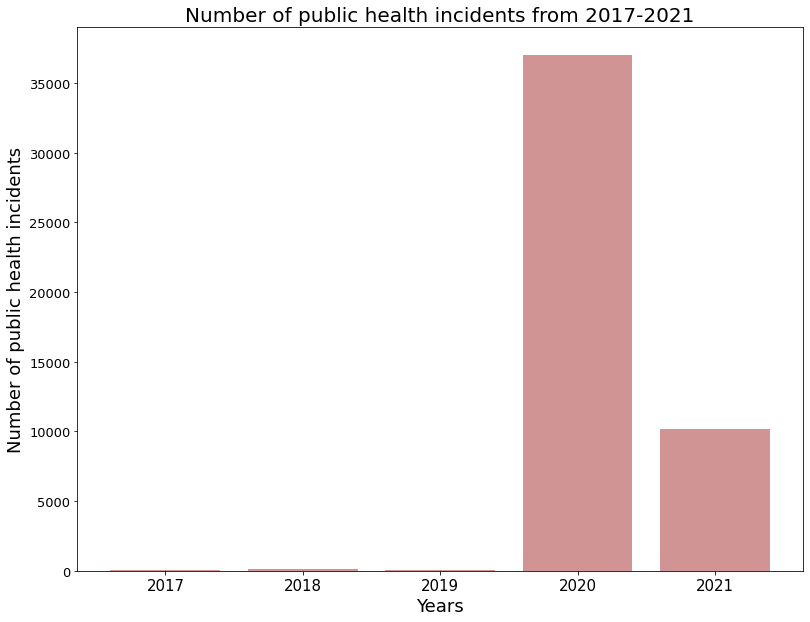

In [219]:
#Plot for the 2017-2021 for public health incidents
plt.rcParams["figure.figsize"] = (13,10)
plt.title("Number of public health incidents from 2017-2021", fontsize=20)
plt.bar(five_year_phealth, incidents_public_health, color='brown', alpha=0.5, align='center')
plt.xticks(ph_pos, five_year_phealth, fontsize=15)
plt.yticks(fontsize=13)
plt.ylabel("Number of public health incidents", fontsize=18)
plt.xlabel("Years", fontsize=18)
plt.ylim((0,39000))
#plt.savefig("Images/Number_of_public_health_incidents_2017-2021.png", dpi=300, bbox_inches='tight')

In [227]:
# crime_df_rename['Offence_Subgroup'].value_counts().head(20)
crime_df_rename_subgp = crime_df_rename[['Offence_Subgroup', 'Incidents_Recorded_Replace']].groupby('Offence_Subgroup').sum()
crime_df_rename_subgp = crime_df_rename_subgp.reset_index().sort_values('Incidents_Recorded_Replace', ascending=False).head(20)
crime_df_rename_subgp.reset_index(drop=True)


,Offence_Subgroup,Incidents_Recorded_Replace
0,B42 Steal from a motor vehicle,493206
1,B49 Other theft,377795
2,B21 Criminal damage,329859
3,B321 Residential non-aggravated burglary,252437
4,B43 Steal from a retail store,180738
5,E21 Breach family violence order,161109
6,B53 Obtain benefit by deception,158703
7,E23 Breach bail conditions,147327
8,B41 Motor vehicle theft,141935
9,B322 Non-residential non-aggravated burglary,130663


In [228]:
crime_df_rename_sub = crime_df_rename[['Offence_Subgroup', 'Incidents_Recorded_Replace']].groupby('Offence_Subgroup').sum()
crime_df_rename_sub = crime_df_rename_sub.reset_index().sort_values('Incidents_Recorded_Replace', ascending=False).head(10)
crime_df_rename_sub.reset_index(drop=True)

,Offence_Subgroup,Incidents_Recorded_Replace
0,B42 Steal from a motor vehicle,493206
1,B49 Other theft,377795
2,B21 Criminal damage,329859
3,B321 Residential non-aggravated burglary,252437
4,B43 Steal from a retail store,180738
5,E21 Breach family violence order,161109
6,B53 Obtain benefit by deception,158703
7,E23 Breach bail conditions,147327
8,B41 Motor vehicle theft,141935
9,B322 Non-residential non-aggravated burglary,130663


In [237]:
# Create an array that contains the number of value counts for the Most common subgroup crimes.
# Collecting the counts from above cell
# five_year_subdiv_crimes = ['Theft', 'Assault', 'Burglary', 'Stalking/harassment', 'Breach of orders', 'Property damage', 'Disorderly conduct', 'Deception', 'Weapons & explosives', 'Justice procedures']
# five_year_suddiv_counts = [55564, 38695, 31077, 22602, 22012, 19680, 17610, 16313, 14003, 12999] 
five_year_subdiv_crimes = crime_df_rename_sub['Offence_Subgroup']
five_year_suddiv_counts = crime_df_rename_sub['Incidents_Recorded_Replace']

In [260]:
crime_pos = np.arange(len(five_year_subdiv_crimes))
crime_pos
label_clean = []
for text in five_year_subdiv_crimes:
    newText = str(text)[4:50]
    newText = newText.strip()
    label_clean.append(newText)
label_clean

['Steal from a motor vehicle',
 'Other theft',
 'Criminal damage',
 'Residential non-aggravated burglary',
 'Steal from a retail store',
 'Breach family violence order',
 'Obtain benefit by deception',
 'Breach bail conditions',
 'Motor vehicle theft',
 'Non-residential non-aggravated burglary']

Text(0.5, 0, 'Types of Sub-crimes')

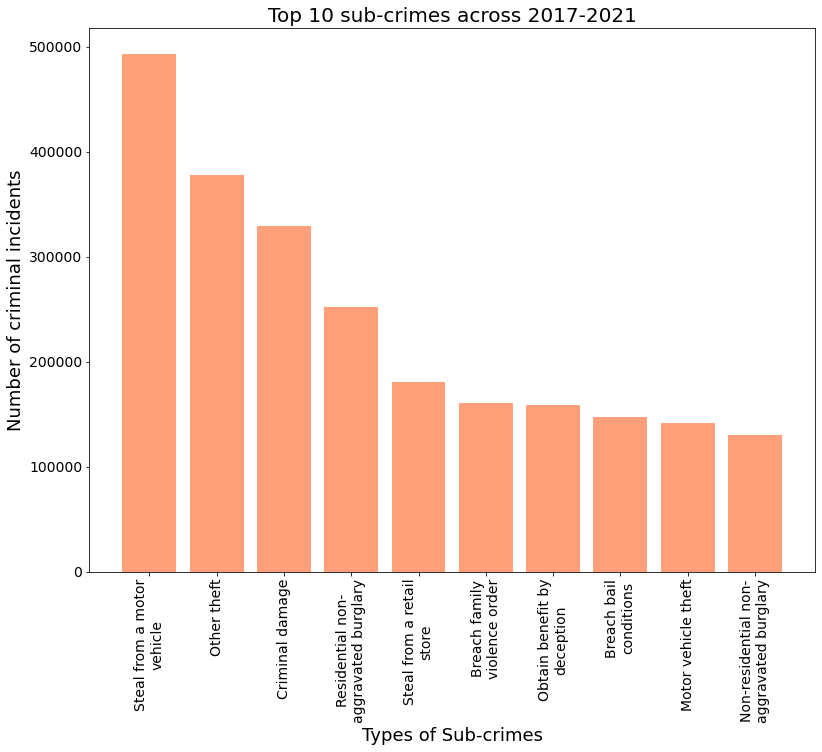

In [261]:
#Plot the graph
from textwrap import wrap
labels = [ '\n'.join(wrap(l, 20)) for l in label_clean]

plt.title("Top 10 sub-crimes across 2017-2021", fontsize=20)
plt.bar(five_year_subdiv_crimes, five_year_suddiv_counts, align="center", color='lightsalmon')
plt.xticks(crime_pos, labels, rotation= 90, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Number of criminal incidents", fontsize=18)
plt.xlabel("Types of Sub-crimes", fontsize=18)
# plt.ylim((0,56000))
#plt.savefig("Images/Top_10_sub_crimes_2017-2021.png", dpi=300, bbox_inches='tight')

In [264]:
# crime_df_rename['Offence_Division'].value_counts()
crime_df_rename_subdv = crime_df_rename[['Offence_Division', 'Incidents_Recorded_Replace']].groupby('Offence_Division').sum().reset_index()
crime_df_rename_subdv = crime_df_rename_subdv.sort_values('Incidents_Recorded_Replace', ascending=False).head(6)
crime_df_rename_subdv.reset_index(drop=True)

,Offence_Division,Incidents_Recorded_Replace
0,B Property and deception offences,2308020
1,A Crimes against the person,571190
2,E Justice procedures offences,397710
3,D Public order and security offences,235685
4,C Drug offences,150217
5,F Other offences,54714


In [265]:
# Create an array that contains the number of value counts for the offence group.
# Collecting the counts from above cell
# offence_division_crimes = ['Property & deception', 'Crimes against the person', 'Public order & security offences', 'Justice procedure offences', 'Drug offences', 'Other offences']
# offence_division_counts = [132554, 89086, 38449, 35011, 22285, 7052]
offence_division_crimes = crime_df_rename_subdv['Offence_Division']
offence_division_counts = crime_df_rename_subdv['Incidents_Recorded_Replace']

In [266]:
offence_div_pos = np.arange(len(offence_division_crimes))
offence_div_pos

array([0, 1, 2, 3, 4, 5])

Text(0.5, 0, 'Offence Division')

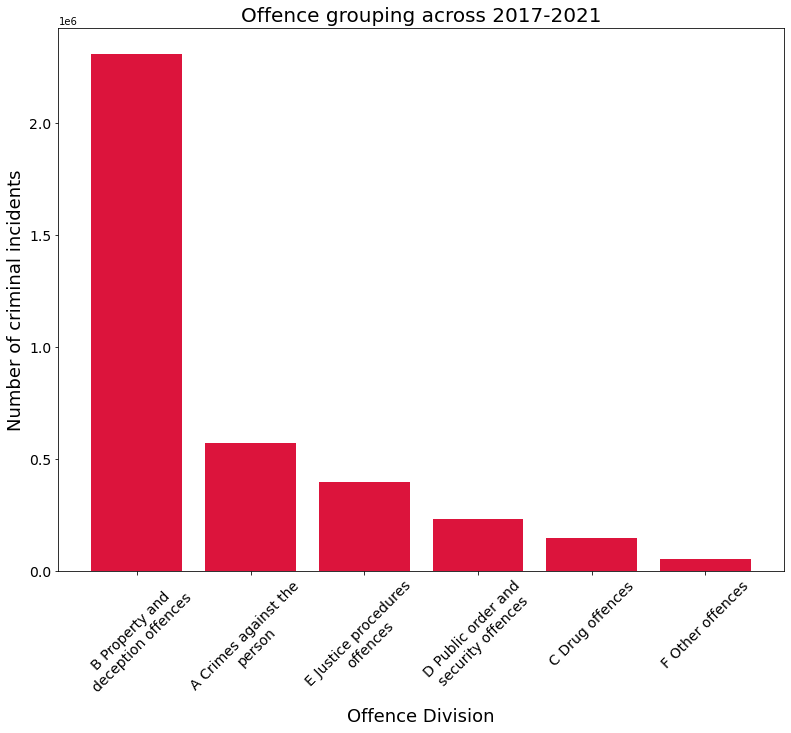

In [274]:
#Plot the graph
labels_offence_division_crimes = [ '\n'.join(wrap(l, 20)) for l in offence_division_crimes]
plt.title("Offence grouping across 2017-2021", fontsize=20)
plt.bar(offence_division_crimes, offence_division_counts, align="center", color='crimson')
plt.xticks(offence_div_pos, labels_offence_division_crimes, rotation= 45, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Number of criminal incidents", fontsize=18)
plt.xlabel("Offence Division", fontsize=18)
# plt.ylim((0,135000))
#plt.savefig("Images/Offence_grouping_2017-2021.png", dpi=300, bbox_inches='tight')

In [268]:
crime_df_rename.head()

,Year,LGA,suburb,Offence_Division,Offence_Subdivision,Offence_Subgroup,Incidents_Recorded,Incidents_Recorded_Replace
0,2021,Alpine,Dederang,A Crimes against the person,Other crimes against the person,Other crimes against the person,1,1
1,2021,Alpine,Dederang,B Property and deception offences,B30 Burglary/Break and enter,B321 Residential non-aggravated burglary,1,1
2,2021,Alpine,Dederang,B Property and deception offences,B50 Deception,B53 Obtain benefit by deception,1,1
3,2021,Alpine,Kergunyah South,E Justice procedures offences,E10 Justice procedures,E14 Pervert the course of justice or commit pe...,1,1
4,2021,Alpine,Mongans Bridge,E Justice procedures offences,E20 Breaches of orders,E21 Breach family violence order,1,1


In [269]:
#To be used for the purposes of differing groups of offence division and subsequent sub-division crimes
crime_df_rename_divide = crime_df_rename[['Offence_Division', 'Offence_Subdivision']]
crime_df_rename_divideDF=crime_df_rename_divide.groupby(['Offence_Division', 'Offence_Subdivision']).count()
crime_df_rename_divideDF


Empty DataFrame
Columns: []
Index: [(A Crimes against the person, A20 Assault and related offences), (A Crimes against the person, A50 Robbery), (A Crimes against the person, A70 Stalking, harassment and threatening behaviour), (A Crimes against the person, A80 Dangerous and negligent acts endangering people), (A Crimes against the person, Other crimes against the person), (B Property and deception offences, B10 Arson), (B Property and deception offences, B20 Property damage), (B Property and deception offences, B30 Burglary/Break and enter), (B Property and deception offences, B40 Theft), (B Property and deception offences, B50 Deception), (B Property and deception offences, B60 Bribery), (C Drug offences, C10 Drug dealing and trafficking), (C Drug offences, C20 Cultivate or manufacture drugs), (C Drug offences, C30 Drug use and possession), (C Drug offences, C90 Other drug offences), (D Public order and security offences, D10 Weapons and explosives offences), (D Public order and security offences, D20 Disorderly and offensive conduct), (D Public order and security offences, D30 Public nuisance offences), (D Public order and security offences, D40 Public security offences), (E Justice procedures offences, E10 Justice procedures), (E Justice procedures offences, E20 Breaches of orders), (F Other offences, F10 Regulatory driving offences), (F Other offences, F20 Transport regulation offences), (F Other offences, F30 Other government regulatory offences), (F Other offences, F90 Miscellaneous offences)]

In [270]:
crime_df_rename

,Year,LGA,suburb,Offence_Division,Offence_Subdivision,Offence_Subgroup,Incidents_Recorded,Incidents_Recorded_Replace
0,2021,Alpine,Dederang,A Crimes against the person,Other crimes against the person,Other crimes against the person,1,1
1,2021,Alpine,Dederang,B Property and deception offences,B30 Burglary/Break and enter,B321 Residential non-aggravated burglary,1,1
2,2021,Alpine,Dederang,B Property and deception offences,B50 Deception,B53 Obtain benefit by deception,1,1
3,2021,Alpine,Kergunyah South,E Justice procedures offences,E10 Justice procedures,E14 Pervert the course of justice or commit pe...,1,1
4,2021,Alpine,Mongans Bridge,E Justice procedures offences,E20 Breaches of orders,E21 Breach family violence order,1,1
...,...,...,...,...,...,...,...,...
324432,2012,Yarriambiack,Tempy,A Crimes against the person,"A70 Stalking, harassment and threatening behav...",A712 Non-FV Stalking,1,1
324433,2012,Yarriambiack,Tempy,B Property and deception offences,B40 Theft,B45 Receiving or handling stolen goods,2,2
324434,2012,Yarriambiack,Tempy,D Public order and security offences,D10 Weapons and explosives offences,D11 Firearms offences,1,1
324435,2012,Yarriambiack,Tempy,D Public order and security offences,D20 Disorderly and offensive conduct,D23 Offensive conduct,1,1


In [271]:
# Extracting top 10 suburb for each year
crime_df_2017 = crime_df_rename.loc[(crime_df_rename['Year'] == 2017), :]
crime_df_2017 = crime_df_2017.groupby(['Year', 'LGA', 'suburb']).sum().reset_index().sort_values('Incidents_Recorded_Replace', ascending=False).head(10)
crime_df_2018 = crime_df_rename.loc[(crime_df_rename['Year'] == 2018), :]
crime_df_2018 = crime_df_2018.groupby(['Year', 'LGA', 'suburb']).sum().reset_index().sort_values('Incidents_Recorded_Replace', ascending=False).head(10)
crime_df_2019 = crime_df_rename.loc[(crime_df_rename['Year'] == 2019), :]
crime_df_2019 = crime_df_2019.groupby(['Year', 'LGA', 'suburb']).sum().reset_index().sort_values('Incidents_Recorded_Replace', ascending=False).head(10)
crime_df_2020 = crime_df_rename.loc[(crime_df_rename['Year'] == 2020), :]
crime_df_2020 = crime_df_2020.groupby(['Year', 'LGA', 'suburb']).sum().reset_index().sort_values('Incidents_Recorded_Replace', ascending=False).head(10)
crime_df_2021 = crime_df_rename.loc[(crime_df_rename['Year'] == 2021), :]
crime_df_2021 = crime_df_2021.groupby(['Year', 'LGA', 'suburb']).sum().reset_index().sort_values('Incidents_Recorded_Replace', ascending=False).head(10)
crime_df_trends = pd.concat([crime_df_2017, crime_df_2018, crime_df_2019, crime_df_2020, crime_df_2021])
crime_df_trends = crime_df_trends.reset_index(drop=True)
crime_df_trends.head()

,Year,LGA,suburb,Incidents_Recorded_Replace
0,2017,Melbourne,Melbourne,15314
1,2017,Greater Dandenong,Dandenong,5875
2,2017,Frankston,Frankston,5529
3,2017,Greater Shepparton,Shepparton,4066
4,2017,Darebin,Preston,4040


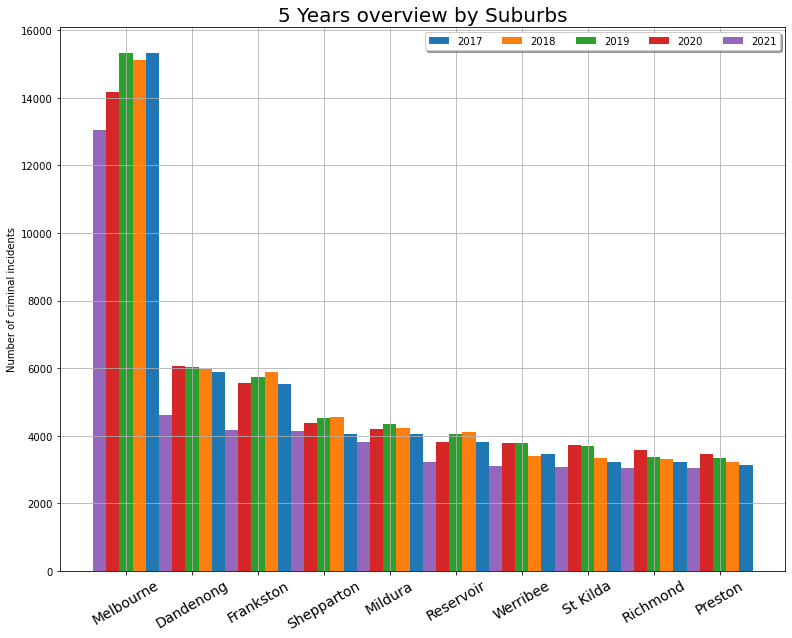

In [102]:
# Plot data

# sYear = 2017
# width = 2

# for i in np.arange(0, 5):
#     year = sYear + i
#     barpos = ((width - i) /10)*2
#     x_axis = crime_df_trends.loc[(crime_df_trends['Year'] == year), 'suburb']
#     data = crime_df_trends.loc[(crime_df_trends['Year'] == year), 'Incidents_Recorded_Replace']
#     x = np.arange(0, len(x_axis))
#     plt.bar(x + barpos, data, 0.2, label=year)
# plt.xticks(x, x_axis, fontsize=14, rotation=30)
# plt.title(f"5 Years overview by Suburbs", fontsize=20)
# # plt.xlabel("Suburbs")
# plt.ylabel("Number of criminal incidents")
# plt.grid(True)
# plt.legend(loc='best', fancybox=True, shadow=True, ncol=5)
# plt.savefig("Images\Five years overview by Suburbs.PNG", facecolor="white", dpi=300)
# plt.show()

# Line Graph
x_axis = 

In [89]:
top_sub_2021 = crime_df_2021['suburb'].tolist()

In [90]:
# top_sub_2021
crime_sub_2021 = crime_df_rename.loc[(crime_df_rename['Year'] == 2021), :]
crime_sub_2021 = crime_sub_2021.groupby(['Year', 'LGA', 'suburb', 'Offence_Subdivision']).sum().reset_index().sort_values('Incidents_Recorded_Replace', ascending=False)

# Only show suburbs in top suburb list
crime_sub_2021 = crime_sub_2021[crime_sub_2021.suburb.isin(top_sub_2021) == True]
crime_sub_2021 = crime_sub_2021.groupby(['Year', 'LGA', 'suburb', 'Offence_Subdivision']).sum().reset_index().sort_values('Incidents_Recorded_Replace', ascending=False)

In [91]:
# Top 10 Offences based on out top suburb
crime_sub_2021_crime_0 = crime_sub_2021.loc[(crime_sub_2021['suburb'] == top_sub_2021[0]), :].head(10)
Offence_Subdivision = list(dict.fromkeys(crime_sub_2021_crime_0['Offence_Subdivision']))

crime_sub_2021_crime_1 = crime_sub_2021.loc[(crime_sub_2021['suburb'] == top_sub_2021[1]), :]
crime_sub_2021_crime_1 = crime_sub_2021_crime_1[crime_sub_2021_crime_1['Offence_Subdivision'].isin(Offence_Subdivision)]
crime_sub_2021_crime_2 = crime_sub_2021.loc[(crime_sub_2021['suburb'] == top_sub_2021[2]), :]
crime_sub_2021_crime_2 = crime_sub_2021_crime_2[crime_sub_2021_crime_2['Offence_Subdivision'].isin(Offence_Subdivision)]
crime_sub_2021_crime_3 = crime_sub_2021.loc[(crime_sub_2021['suburb'] == top_sub_2021[3]), :]
crime_sub_2021_crime_3 = crime_sub_2021_crime_3[crime_sub_2021_crime_3['Offence_Subdivision'].isin(Offence_Subdivision)]
crime_sub_2021_crime_4 = crime_sub_2021.loc[(crime_sub_2021['suburb'] == top_sub_2021[4]), :]
crime_sub_2021_crime_4 = crime_sub_2021_crime_4[crime_sub_2021_crime_4['Offence_Subdivision'].isin(Offence_Subdivision)]
crime_sub_2021_crime_5 = crime_sub_2021.loc[(crime_sub_2021['suburb'] == top_sub_2021[5]), :]
crime_sub_2021_crime_5 = crime_sub_2021_crime_5[crime_sub_2021_crime_5['Offence_Subdivision'].isin(Offence_Subdivision)]
crime_sub_2021_crime_6 = crime_sub_2021.loc[(crime_sub_2021['suburb'] == top_sub_2021[6]), :]
crime_sub_2021_crime_6 = crime_sub_2021_crime_6[crime_sub_2021_crime_6['Offence_Subdivision'].isin(Offence_Subdivision)]
crime_sub_2021_crime_7 = crime_sub_2021.loc[(crime_sub_2021['suburb'] == top_sub_2021[7]), :]
crime_sub_2021_crime_7 = crime_sub_2021_crime_7[crime_sub_2021_crime_7['Offence_Subdivision'].isin(Offence_Subdivision)]
crime_sub_2021_crime_8 = crime_sub_2021.loc[(crime_sub_2021['suburb'] == top_sub_2021[8]), :]
crime_sub_2021_crime_8 = crime_sub_2021_crime_8[crime_sub_2021_crime_8['Offence_Subdivision'].isin(Offence_Subdivision)]
crime_sub_2021_crime_9 = crime_sub_2021.loc[(crime_sub_2021['suburb'] == top_sub_2021[9]), :]
crime_sub_2021_crime_9 = crime_sub_2021_crime_9[crime_sub_2021_crime_9['Offence_Subdivision'].isin(Offence_Subdivision)]
crime_sub_2021_crime = pd.concat([crime_sub_2021_crime_0, crime_sub_2021_crime_1, crime_sub_2021_crime_2, crime_sub_2021_crime_3, crime_sub_2021_crime_4,
                                crime_sub_2021_crime_5, crime_sub_2021_crime_6, crime_sub_2021_crime_7, crime_sub_2021_crime_8,
                                crime_sub_2021_crime_9]).reset_index(drop=True)
# crime_sub_2021_crime


In [92]:
Offence_Subdivision_clean=[]
for offence in Offence_Subdivision:
    if not (str(offence)[0:5] == "Other"):
        Offence_Subdivision_clean.append(str(offence)[4:50])
    else:
        Offence_Subdivision_clean.append(offence)

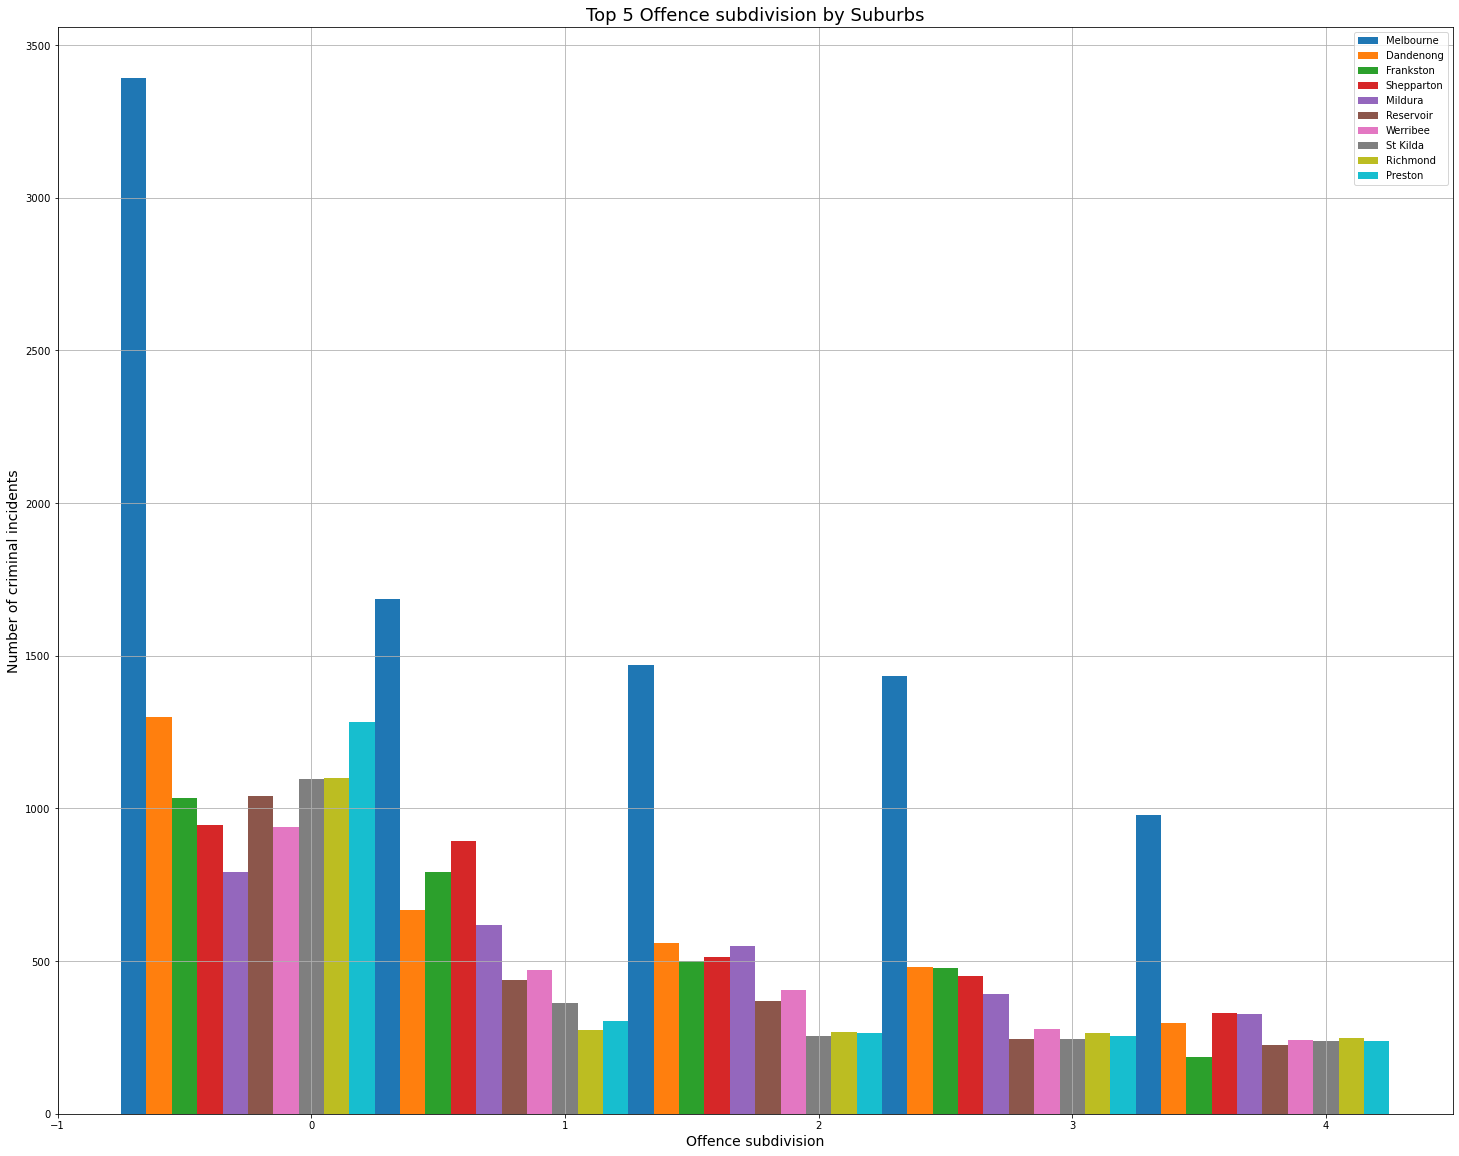

In [95]:
plt.figure(figsize = (25, 20))

y_0 = crime_sub_2021_crime_0['Incidents_Recorded_Replace'][0:5].tolist()
y_1 = crime_sub_2021_crime_1['Incidents_Recorded_Replace'][0:5].tolist()
y_2 = crime_sub_2021_crime_2['Incidents_Recorded_Replace'][0:5].tolist()
y_3 = crime_sub_2021_crime_3['Incidents_Recorded_Replace'][0:5].tolist()
y_4 = crime_sub_2021_crime_4['Incidents_Recorded_Replace'][0:5].tolist()
y_5 = crime_sub_2021_crime_5['Incidents_Recorded_Replace'][0:5].tolist()
y_6 = crime_sub_2021_crime_6['Incidents_Recorded_Replace'][0:5].tolist()
y_7 = crime_sub_2021_crime_7['Incidents_Recorded_Replace'][0:5].tolist()
y_8 = crime_sub_2021_crime_8['Incidents_Recorded_Replace'][0:5].tolist()
y_9 = crime_sub_2021_crime_9['Incidents_Recorded_Replace'][0:5].tolist()
Offence_Subdivision_clean_1 = Offence_Subdivision_clean[0:5]
x_axis = np.arange(len(Offence_Subdivision_clean_1))
width = 0.1
plt.bar(x_axis - 0.7, y_0, width, label = top_sub_2021[0])
plt.bar(x_axis - 0.6, y_1, width, label = top_sub_2021[1])
plt.bar(x_axis - 0.5, y_2, width, label = top_sub_2021[2])
plt.bar(x_axis - 0.4, y_3, width, label = top_sub_2021[3])
plt.bar(x_axis - 0.3, y_4, width, label = top_sub_2021[4])
plt.bar(x_axis - 0.2, y_5, width, label = top_sub_2021[5])
plt.bar(x_axis - 0.1, y_6, width, label = top_sub_2021[6])
plt.bar(x_axis + 0, y_7, width, label = top_sub_2021[7])
plt.bar(x_axis + 0.1, y_8, width, label = top_sub_2021[8])
plt.bar(x_axis + 0.2, y_9, width, label = top_sub_2021[9])

# plt.xticks(x_axis-0.7, Offence_Subdivision_clean_1, fontsize=14)
plt.xlabel("Offence subdivision", fontsize=14)
plt.ylabel("Number of criminal incidents", fontsize=14)
plt.title("Top 5 Offence subdivision by Suburbs",  fontsize=18)
plt.legend()
plt.grid()
plt.savefig("Images\Top 5 Offence subdivision by Suburbs 2020 - 2021.PNG", facecolor="white", dpi=300, bbox_inches='tight')
plt.show()

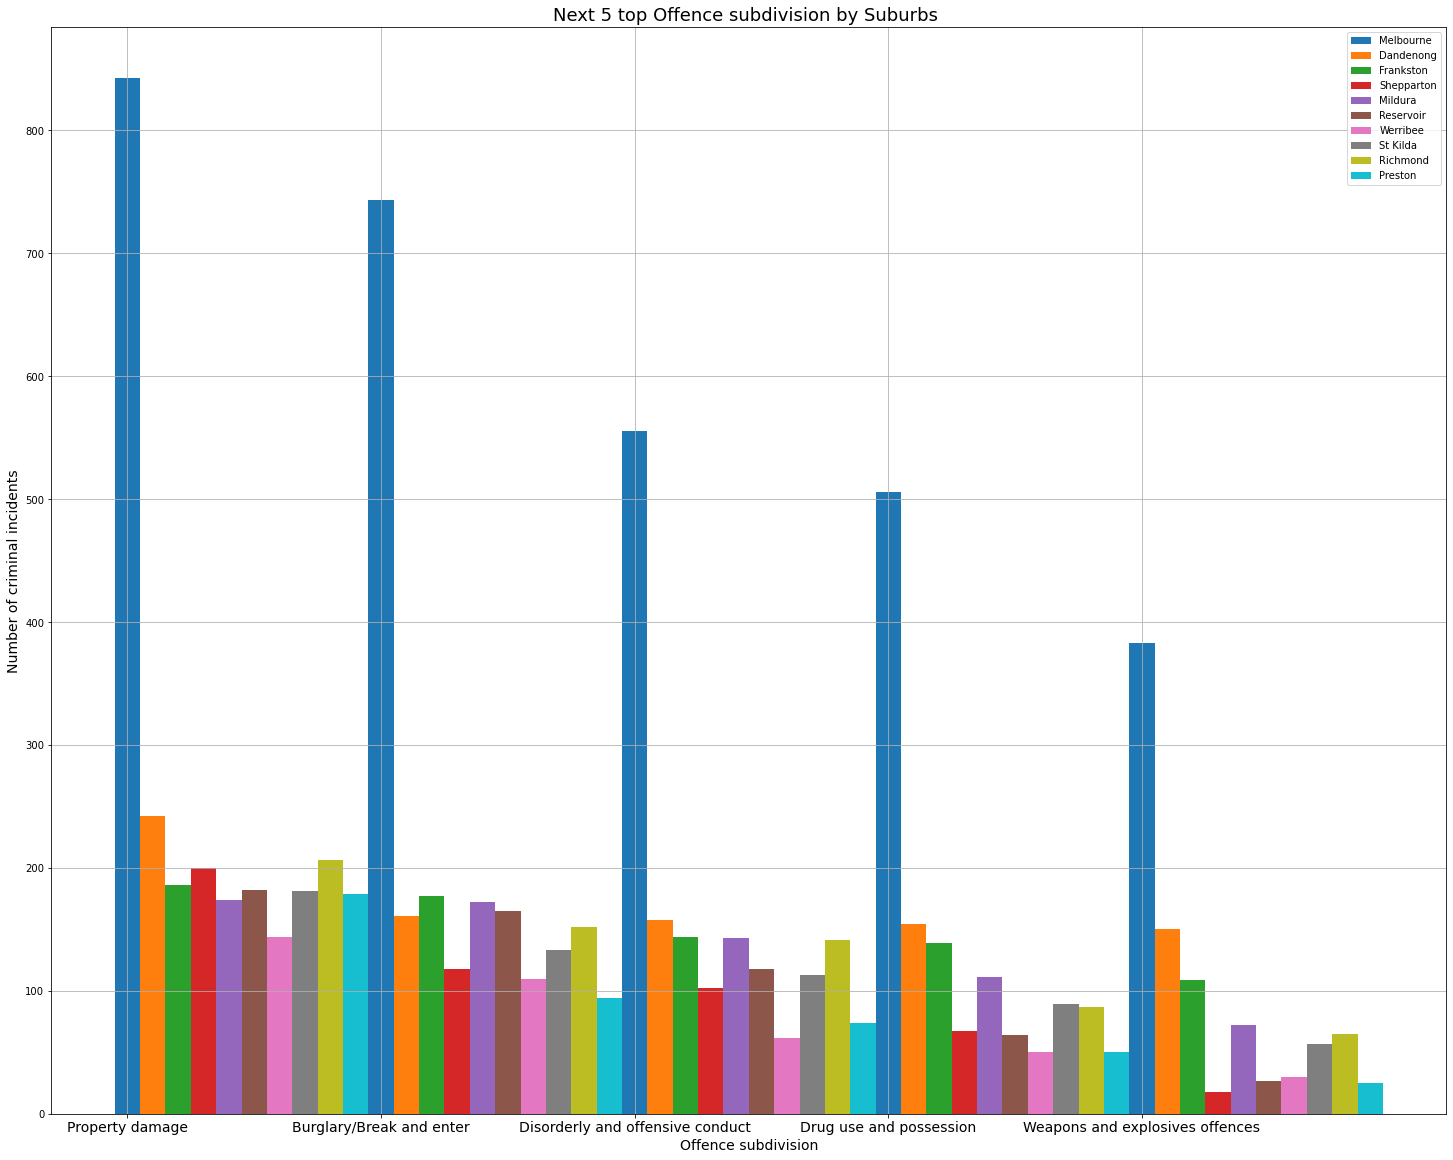

In [101]:
plt.figure(figsize = (25, 20))

y_0 = crime_sub_2021_crime_0['Incidents_Recorded_Replace'][5:10].tolist()
y_1 = crime_sub_2021_crime_1['Incidents_Recorded_Replace'][5:10].tolist()
y_2 = crime_sub_2021_crime_2['Incidents_Recorded_Replace'][5:10].tolist()
y_3 = crime_sub_2021_crime_3['Incidents_Recorded_Replace'][5:10].tolist()
y_4 = crime_sub_2021_crime_4['Incidents_Recorded_Replace'][5:10].tolist()
y_5 = crime_sub_2021_crime_5['Incidents_Recorded_Replace'][5:10].tolist()
y_6 = crime_sub_2021_crime_6['Incidents_Recorded_Replace'][5:10].tolist()
y_7 = crime_sub_2021_crime_7['Incidents_Recorded_Replace'][5:10].tolist()
y_8 = crime_sub_2021_crime_8['Incidents_Recorded_Replace'][5:10].tolist()
y_9 = crime_sub_2021_crime_9['Incidents_Recorded_Replace'][5:10].tolist()
Offence_Subdivision_clean_2 = Offence_Subdivision_clean[5:10]
x_axis = np.arange(len(Offence_Subdivision_clean_2))
width = 0.1
plt.bar(x_axis - 0.7, y_0, width, label = top_sub_2021[0])
plt.bar(x_axis - 0.6, y_1, width, label = top_sub_2021[1])
plt.bar(x_axis - 0.5, y_2, width, label = top_sub_2021[2])
plt.bar(x_axis - 0.4, y_3, width, label = top_sub_2021[3])
plt.bar(x_axis - 0.3, y_4, width, label = top_sub_2021[4])
plt.bar(x_axis - 0.2, y_5, width, label = top_sub_2021[5])
plt.bar(x_axis - 0.1, y_6, width, label = top_sub_2021[6])
plt.bar(x_axis + 0, y_7, width, label = top_sub_2021[7])
plt.bar(x_axis + 0.1, y_8, width, label = top_sub_2021[8])
plt.bar(x_axis + 0.2, y_9, width, label = top_sub_2021[9])

plt.xticks(x_axis-0.7, Offence_Subdivision_clean_2, fontsize=14)
plt.xlabel("Offence subdivision", fontsize=14)
plt.ylabel("Number of criminal incidents", fontsize=14)
plt.title("Next 5 top Offence subdivision by Suburbs ",  fontsize=18)
plt.legend()
plt.grid()
# plt.savefig("Images\Next Top 5 Offence subdivision by Suburbs 2020 - 2021.PNG", facecolor="white", dpi=300, bbox_inches='tight')
plt.show()